In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

r = pd.read_json('resolver_geolocation.json')
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
r.head()

df = pd.read_json('data_250.json')
df["difference"] = df["rtime"] - df["ping_time"]


In [26]:
ip_australia.head()

,resolver,IP_address,country_iso_code,country_name,city_name
17,https://dns.cloudflare.com/dns-query,1.0.0.1,AU,Australia,None
18,https://family.cloudflare-dns.com/dns-query,1.0.0.3,AU,Australia,None
19,https://security.cloudflare-dns.com/dns-query,1.0.0.2,AU,Australia,None
61,https://doh.seby.io/dns-query,45.76.113.31,AU,Australia,Alexandria
62,https://doh-2.seby.io/dns-query,139.99.222.72,AU,Australia,Sydney


In [27]:
#Switch Cloudflare from Aus to NA
ip_australia = ip_australia.drop(labels=17, axis=0)
ip_australia = ip_australia.drop(labels=18, axis=0)
ip_australia = ip_australia.drop(labels=19, axis=0)
ip_australia

,resolver,IP_address,country_iso_code,country_name,city_name
61,https://doh.seby.io/dns-query,45.76.113.31,AU,Australia,Alexandria
62,https://doh-2.seby.io/dns-query,139.99.222.72,AU,Australia,Sydney


In [28]:
cloudflare1 = {'resolver':'https://dns.cloudflare.com/dns-query',
        'IP_address':'1.0.0.1','country_iso_code':'US','country_name': 'United States', 'city_name':'None'
       }
cloudflare2 = {'resolver':'https://family.cloudflare-dns.com/dns-query',
        'IP_address':'1.0.0.3','country_iso_code':'US', 'country_name': 'United States', 'city_name':'None'
       }
cloudflare3 = {'resolver':'https://security.cloudflare-dns.com/dns-query',
        'IP_address':'1.0.0.2','country_iso_code':'US', 'country_name': 'United States', 'city_name':'None'
       }
ip_north_america = ip_north_america.append(cloudflare1, ignore_index = True)
ip_north_america = ip_north_america.append(cloudflare2, ignore_index = True)
ip_north_america = ip_north_america.append(cloudflare3, ignore_index = True)

In [29]:
ip_north_america

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://dns.google/dns-query,8.8.8.8,US,United States,None
1,https://doh.la.ahadns.net/dns-query,45.67.219.208,US,United States,Los Angeles
2,https://dohtrial.att.net/dns-query,13.89.120.251,US,United States,Des Moines
3,https://dns1.dnscrypt.ca/dns-query,167.114.220.125,CA,Canada,Montreal
4,https://dns2.dnscrypt.ca/dns-query,149.56.228.45,CA,Canada,Montreal
5,https://doh.cleanbrowsing.org/dns-query,185.228.168.10,US,United States,None
6,https://doh.cleanbrowsing.org/dns-query,185.228.168.10,US,United States,None
7,https://doh.cleanbrowsing.org/dns-query,185.228.168.10,US,United States,None
8,https://ordns.he.net/dns-query,74.82.42.42,US,United States,None
9,https://adblock.doh.mullvad.net/dns-query,194.242.2.3,US,United States,Los Angeles


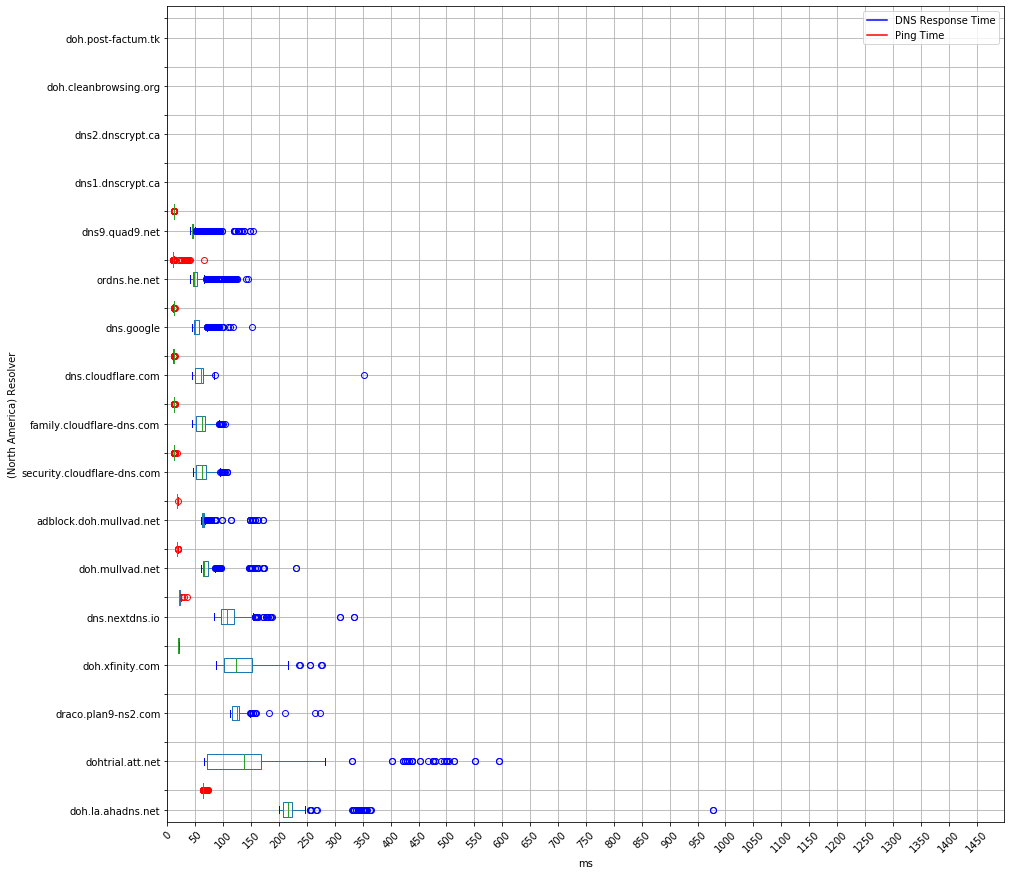

In [45]:
## This boxplot sorts by ascending order of DNS response time



# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = NA_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[medians.index]
response_times = NA_frame_to_plot[medians.index]


NA_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.xticks(rotation=45)
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

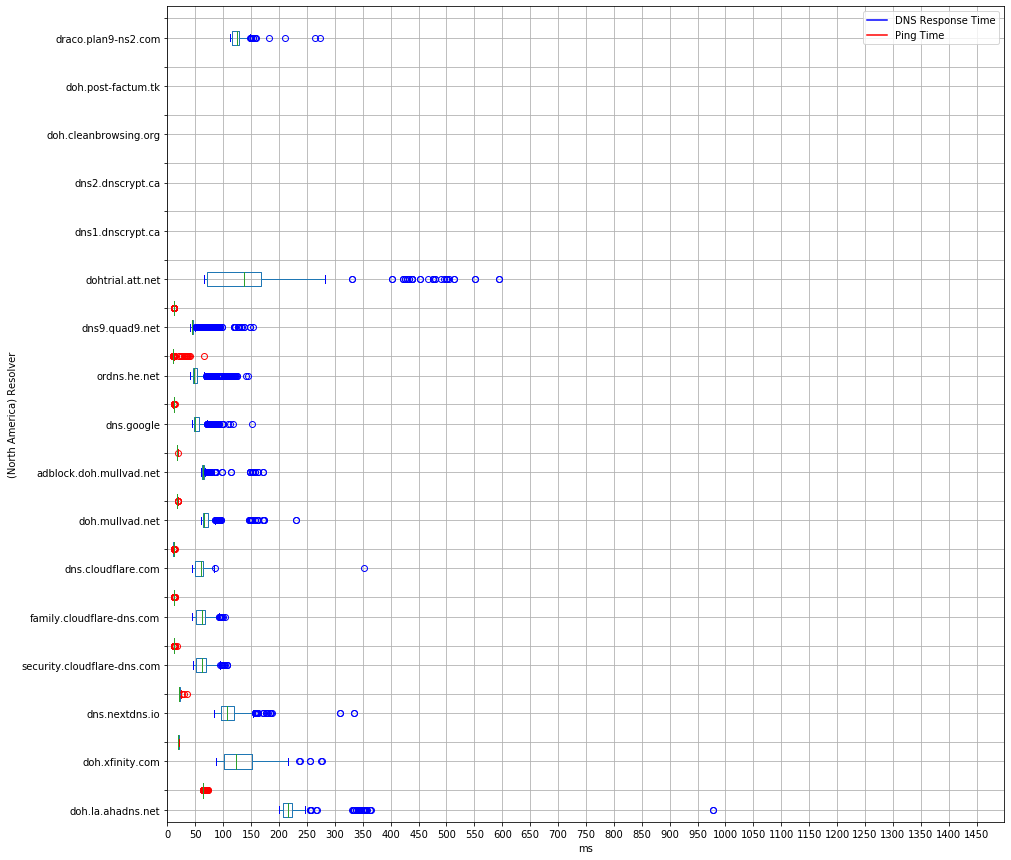

In [31]:
## This boxplot sorts by difference between response time and ping time in ascending order



# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot

# differences between response time and ping time

NA_dict_diff_series={}

NA_both_diff=[0]*NA_length
NA_diff_series = [0]*NA_length
for i in range(NA_length):
    NA_both_diff[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_diff_series[i]=(NA_both_diff[i]['difference'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_diff_series[NA_new_list[i]]= NA_diff_series[i]
NA_diff_frame_to_plot=pd.DataFrame(NA_dict_diff_series)
NA_diff = NA_diff_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = NA_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[medians.index]
response_times = NA_frame_to_plot[medians.index]


NA_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

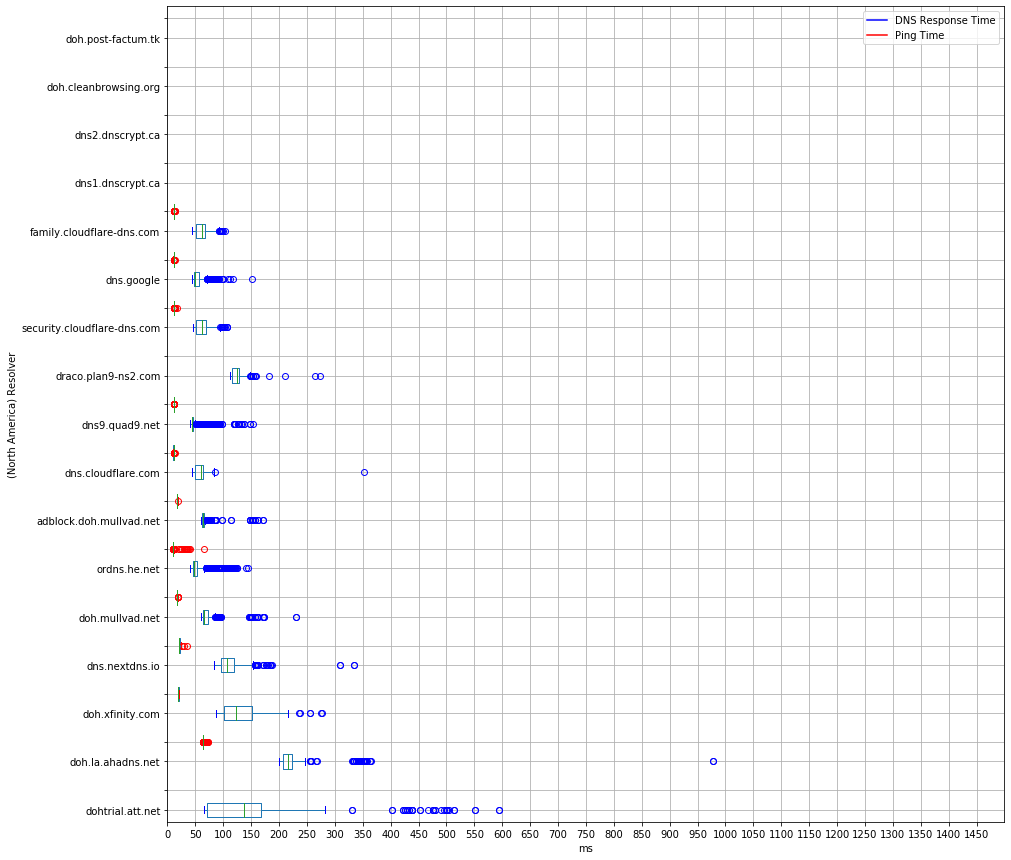

In [32]:
## This boxplot sorts by standard deviation of response time in ascending order



# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot

#Make two plots and merge
c = "blue"
z = "red"


deviation = NA_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[deviation.index]
response_times = NA_frame_to_plot[deviation.index]


NA_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

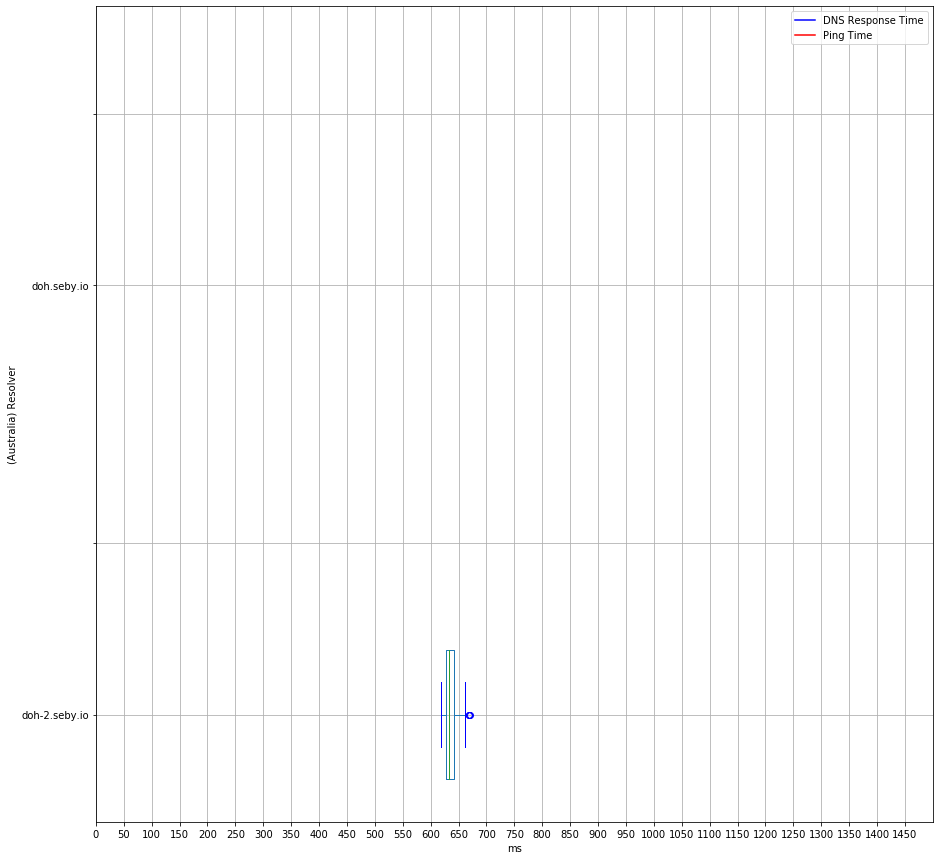

In [33]:
## This boxplot sorts by ascending order of DNS response time



# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}


aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = aus_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = aus_ping[medians.index]
response_times = aus_frame_to_plot[medians.index]


aus_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(aus_dict_resp_time_series)))*2.0-0.4, widths=0.6)
aus_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(aus_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Australia.png")
plt.show()

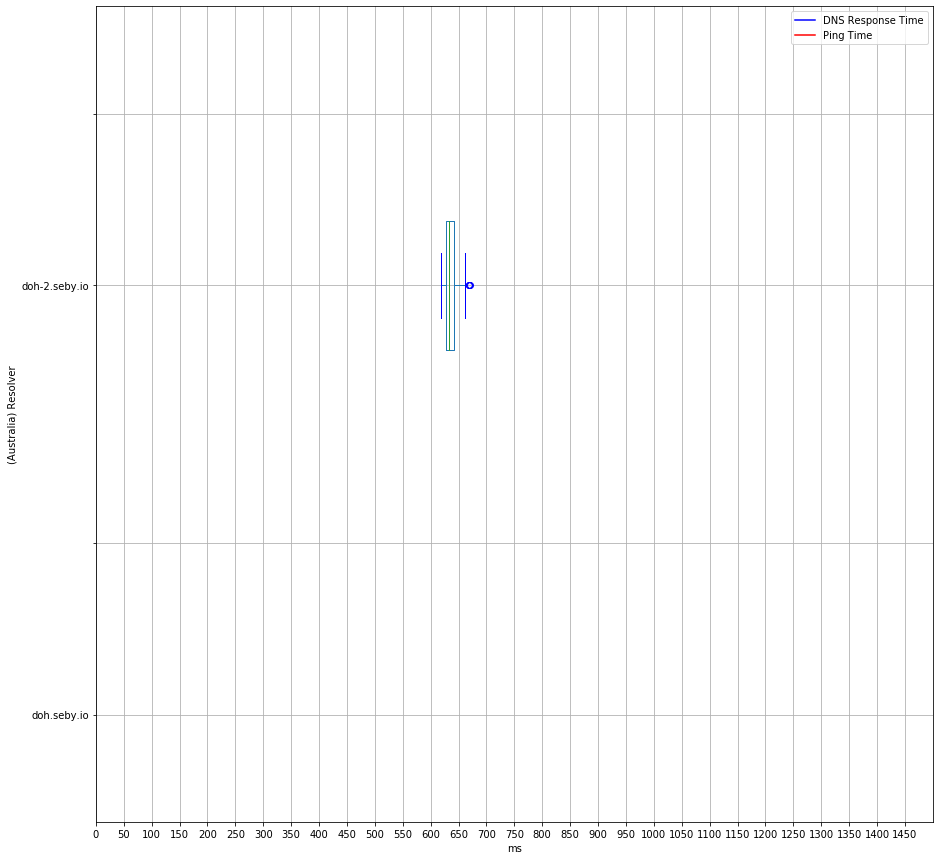

In [34]:
## This boxplot sorts by difference between response time and ping time in ascending order



# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}


aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot

# differences between response time and ping time

aus_dict_diff_series={}

aus_both_diff=[0]*aus_length
aus_diff_series = [0]*aus_length
for i in range(aus_length):
    aus_both_diff[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_diff_series[i]=(aus_both_diff[i]['difference'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_diff_series[aus_new_list[i]]= aus_diff_series[i]
aus_diff_frame_to_plot=pd.DataFrame(aus_dict_diff_series)
aus_diff = aus_diff_frame_to_plot

#Make two plots and merge
c = "blue"
z = "red"



medians = aus_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = aus_ping[medians.index]
response_times = aus_frame_to_plot[medians.index]


aus_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(aus_dict_resp_time_series)))*2.0-0.4, widths=0.6)
aus_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(aus_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

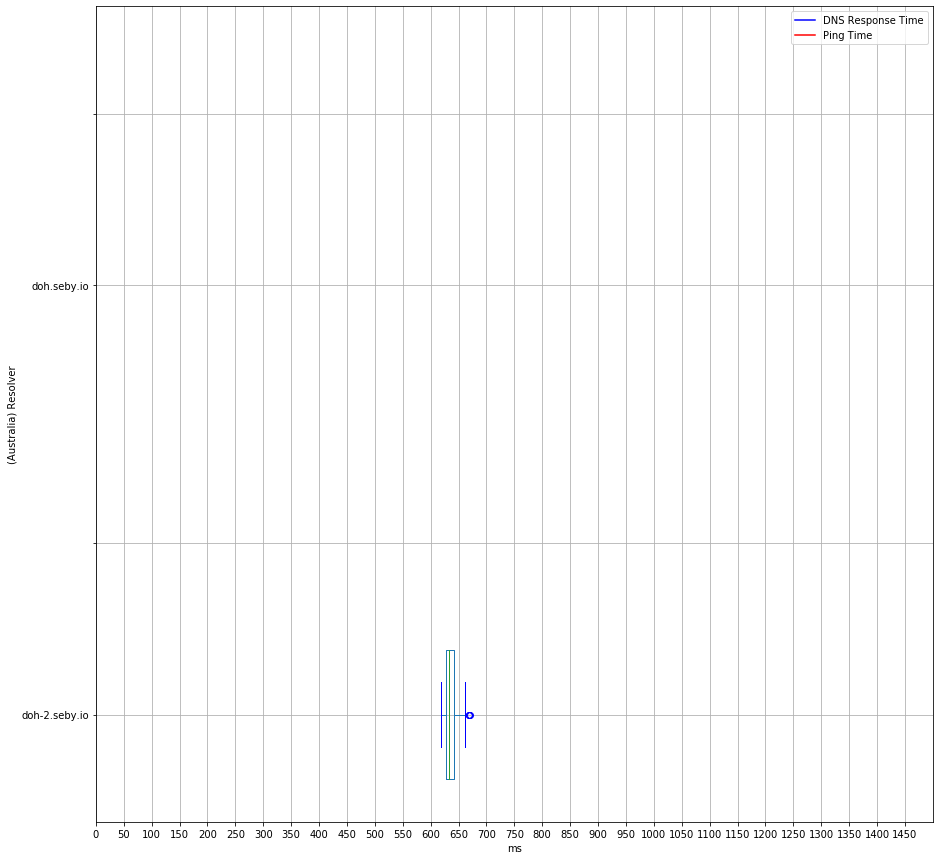

In [35]:
## This boxplot sorts by standard deviation of response time in ascending order



# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}


aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



deviation = aus_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = aus_ping[deviation.index]
response_times = aus_frame_to_plot[deviation.index]


aus_boxplot = response_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(aus_dict_resp_time_series)))*2.0-0.4, widths=0.6)
aus_ping_boxplot = ping_times.boxplot(vert=False,figsize=(15,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(aus_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

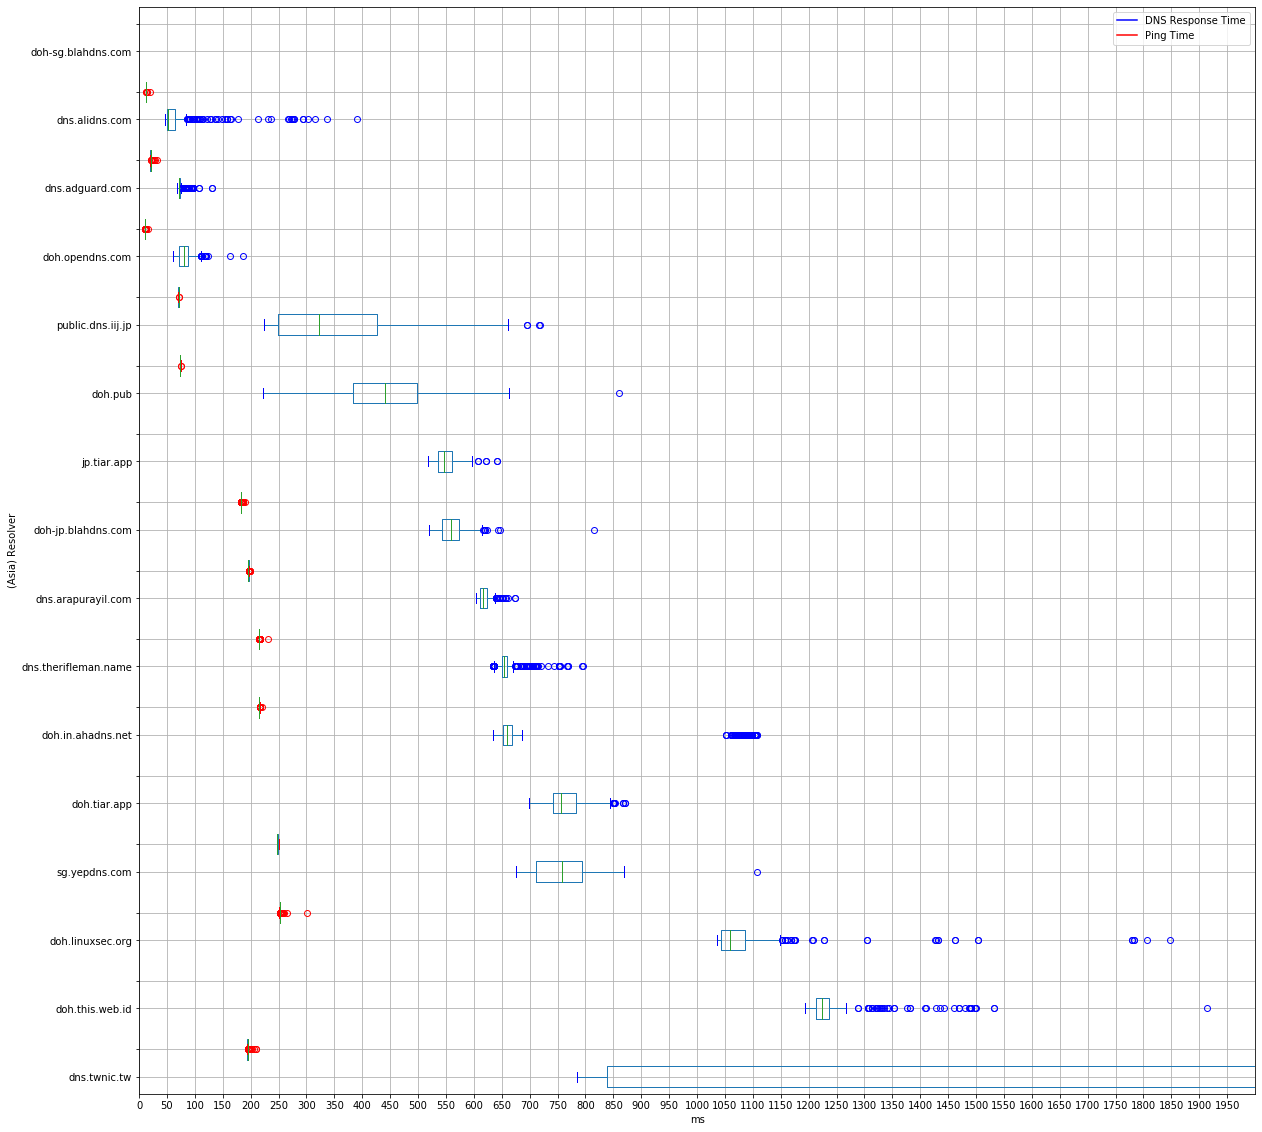

In [36]:
## This boxplot sorts by ascending order of DNS response time



# Asia Boxplot for Response Time, Domain: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = asia_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
response_times = asia_frame_to_plot[medians.index]


asia_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Asia.png")
plt.show()

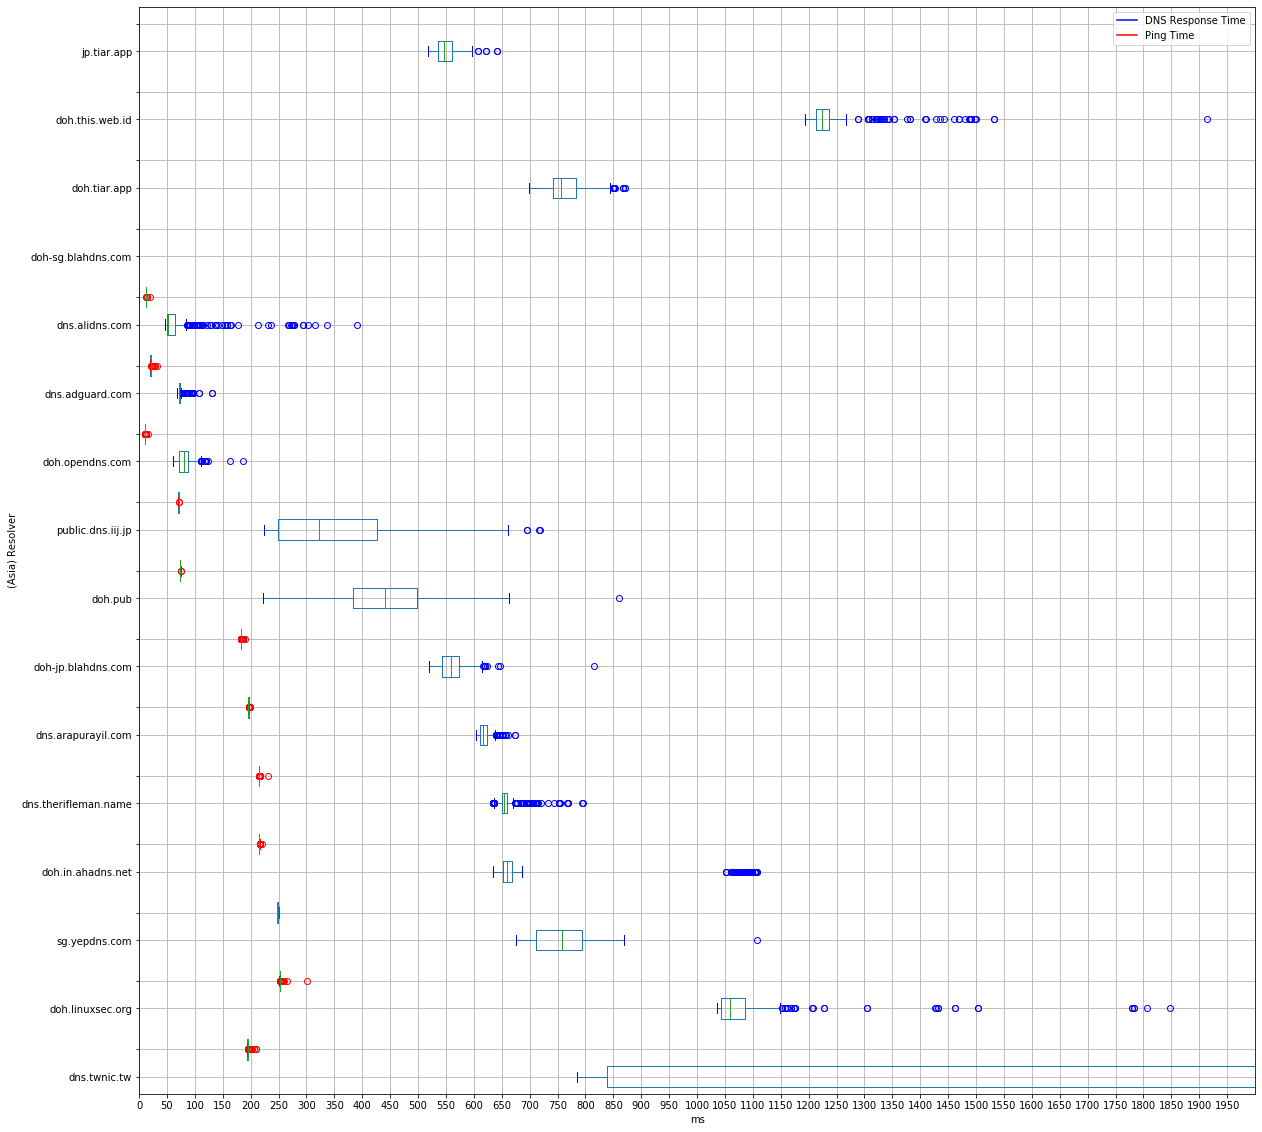

In [37]:
## This boxplot sorts by difference between response time and ping time in ascending order



# Asia Boxplot for Response Time, Domain: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot

# differences between response time and ping time

asia_dict_diff_series={}

asia_both_diff=[0]*asia_length
asia_diff_series = [0]*asia_length
for i in range(asia_length):
    asia_both_diff[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_diff_series[i]=(asia_both_diff[i]['difference'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_diff_series[asia_new_list[i]]= asia_diff_series[i]
asia_diff_frame_to_plot=pd.DataFrame(asia_dict_diff_series)
asia_diff = asia_diff_frame_to_plot

#Make two plots and merge
c = "blue"
z = "red"



medians = asia_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
response_times = asia_frame_to_plot[medians.index]


asia_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

In [38]:
asia_frame_to_plot.describe()

,dns.adguard.com,doh.in.ahadns.net,dns.alidns.com,dns.arapurayil.com,doh.opendns.com,dns.therifleman.name,doh.pub,doh-jp.blahdns.com,doh-sg.blahdns.com,doh.tiar.app,public.dns.iij.jp,doh.this.web.id,jp.tiar.app,doh.linuxsec.org,dns.twnic.tw,sg.yepdns.com
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0,500.000000,500.000000,498.000000,500.000000,1000.000000,500.000000,500.000000
mean,74.091301,712.516033,66.934984,618.034930,82.018028,659.344162,437.412344,560.327839,NaN,762.958293,355.865231,2461.424178,550.974784,1129.980800,17773.323579,759.020063
std,7.096928,143.003024,44.487523,9.660330,13.948715,22.466238,123.442172,24.863188,NaN,32.203898,118.504308,19028.376091,21.098700,720.272316,15711.847387,54.050807
min,68.666325,634.521909,45.785086,603.748911,60.851963,634.891709,222.869814,518.982152,NaN,697.964900,223.583089,1193.437656,518.313120,1035.761437,784.338016,675.706214
25%,71.119197,652.541021,49.610802,611.864384,71.613364,649.534212,383.657189,543.715295,NaN,741.533951,249.097617,1212.557646,535.450187,1043.095751,839.254064,712.040064
50%,72.200902,659.784743,51.283045,616.187752,80.394263,654.607252,440.132352,558.583917,NaN,755.928003,323.157260,1224.488890,545.965472,1059.672069,32176.924130,757.953855
75%,72.937243,669.210327,63.753839,622.695967,87.228372,658.702036,497.652790,572.460031,NaN,783.458689,425.734061,1237.271882,561.618338,1085.509698,32376.914223,793.014416
max,131.463524,1107.950258,390.599711,673.636062,185.535522,795.807707,859.684875,815.599443,NaN,871.331705,718.521909,301825.864335,641.759244,16211.656015,33361.231070,1107.715331


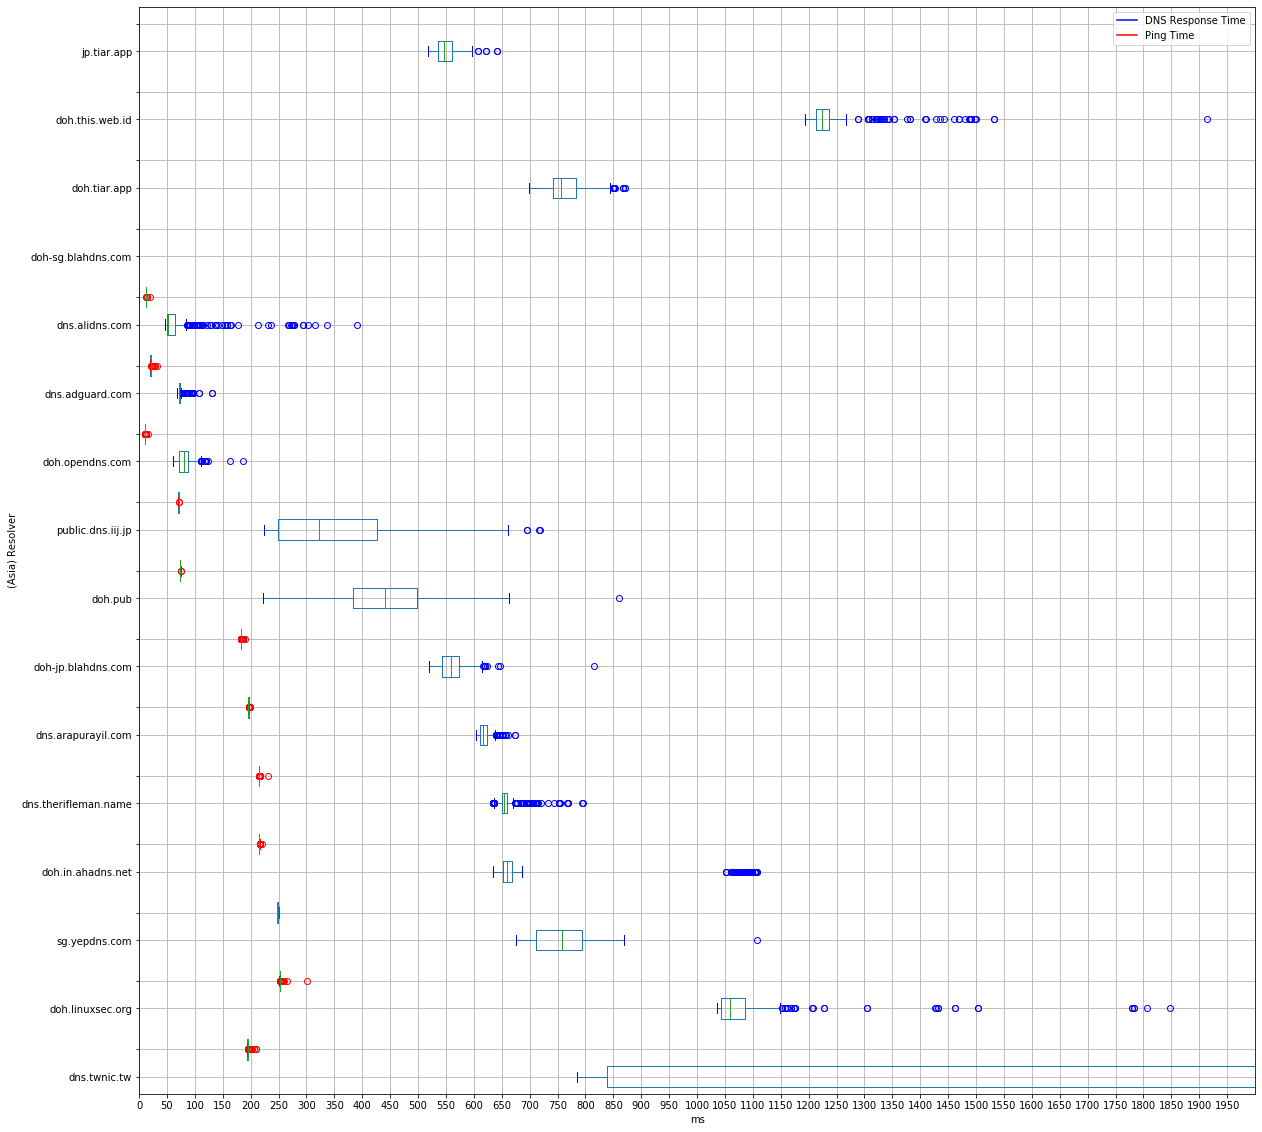

In [39]:
## This boxplot sorts by standard deviation of response time in ascending order



# Asia Boxplot for Response Time, Domain: Google and Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


deviation = asia_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
response_times = asia_frame_to_plot[medians.index]


asia_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()

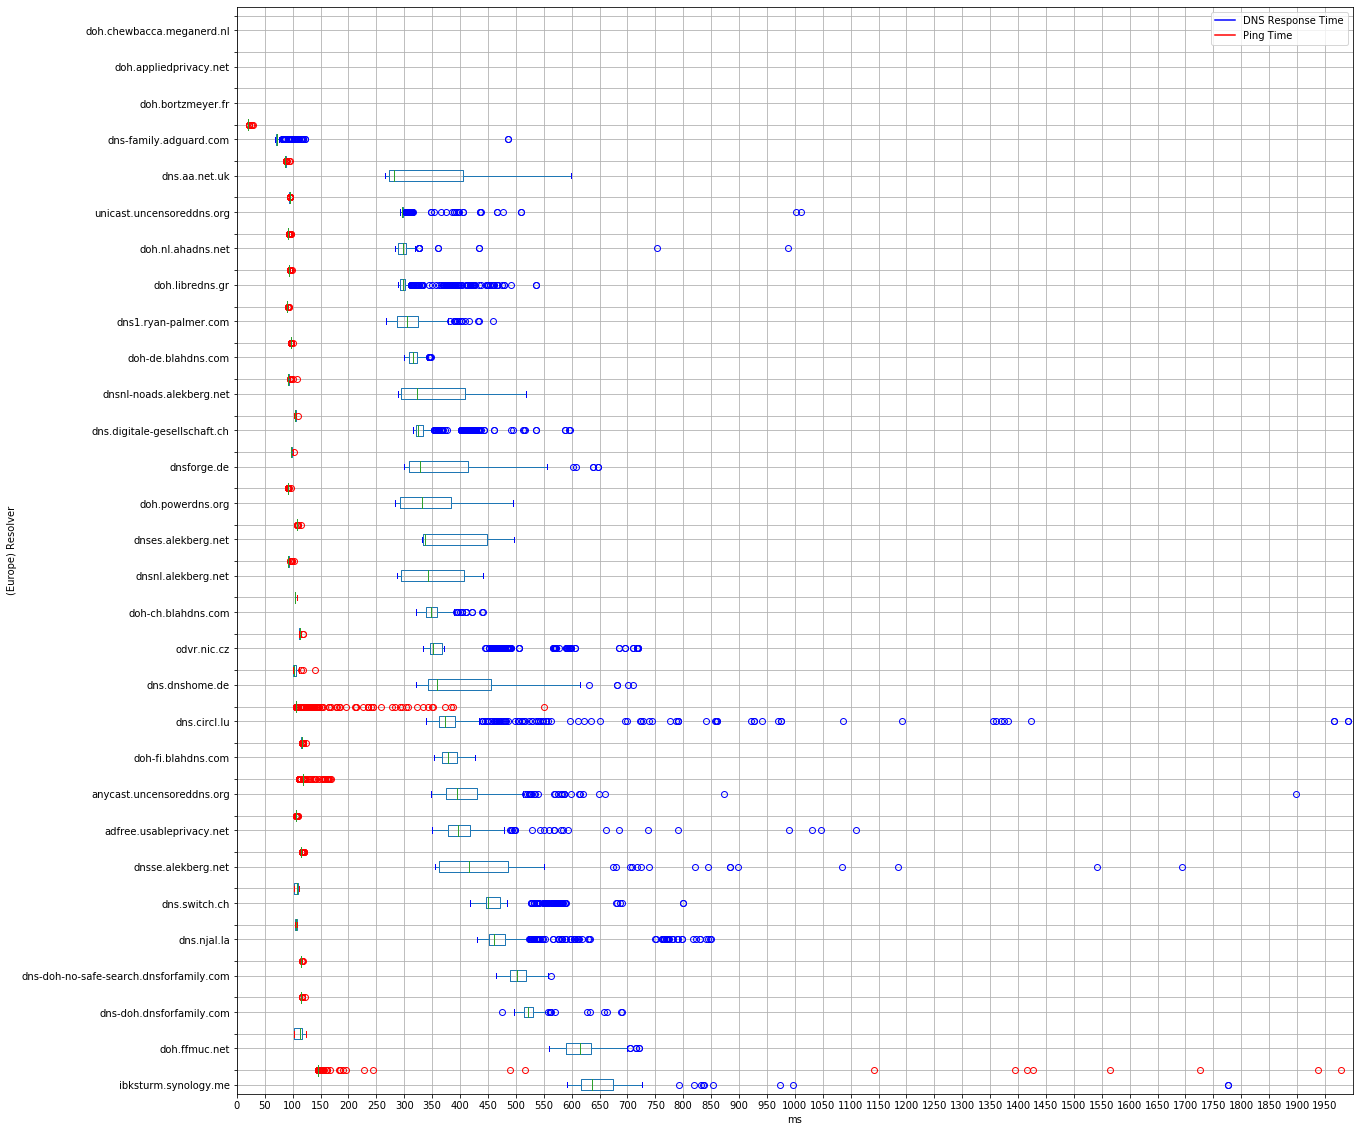

In [40]:
## This boxplot sorts by ascending order of DNS response time



# Europe Boxplot for Response Time, Domain: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = eur_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[medians.index]
response_times = eur_frame_to_plot[medians.index]


eur_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Europe.png")
plt.show()

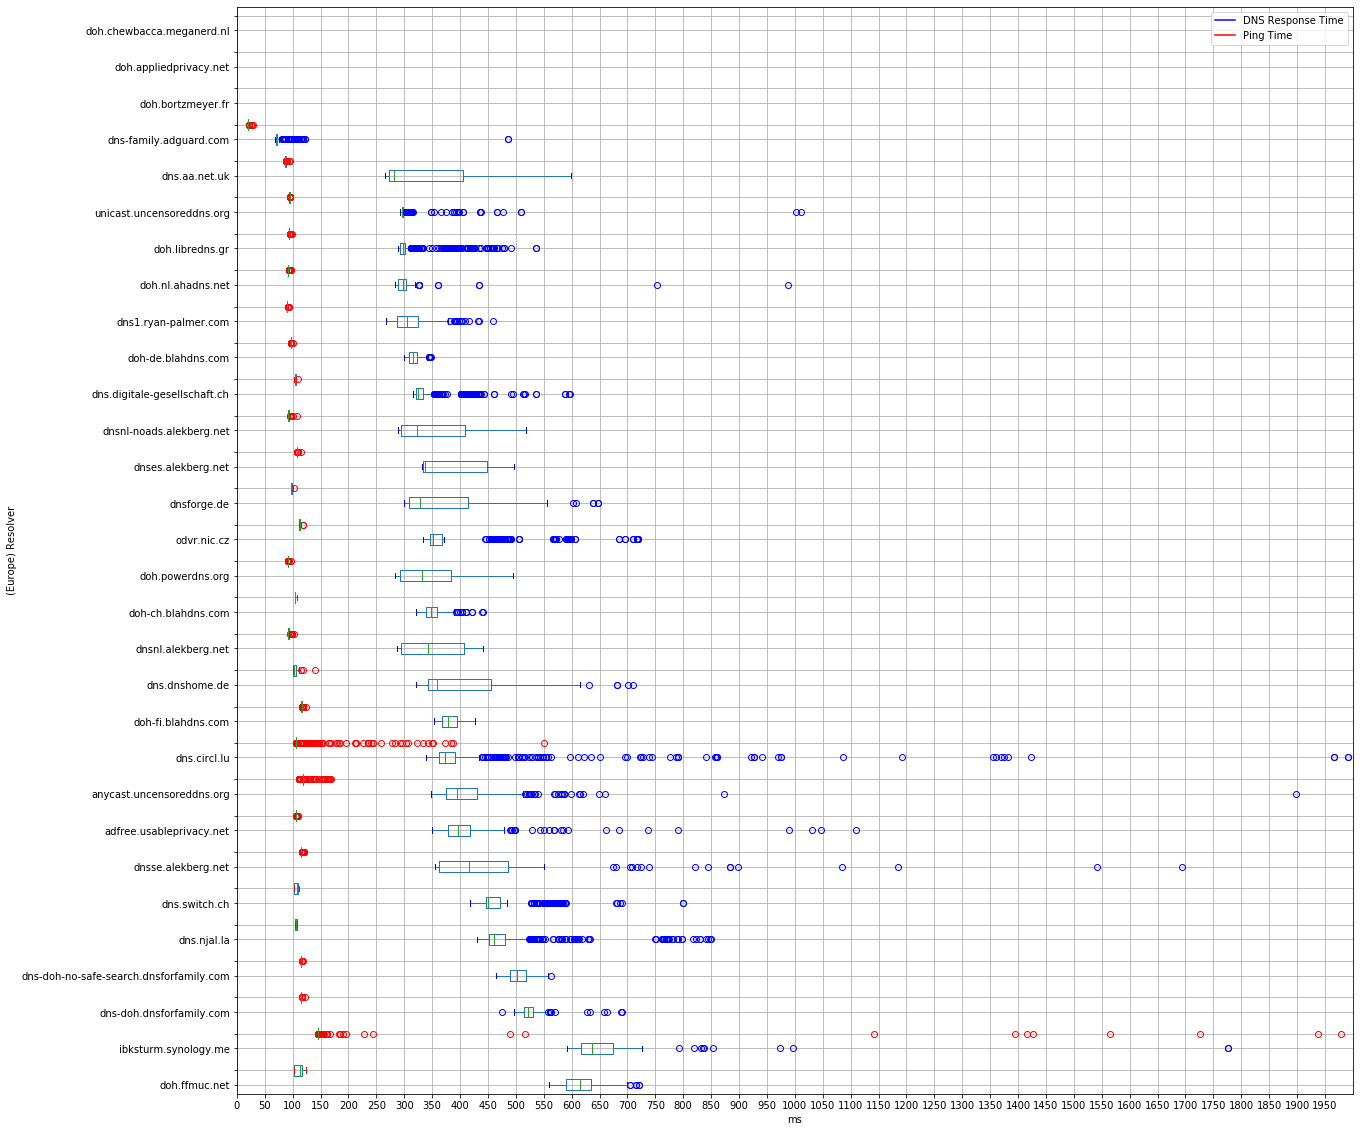

In [41]:
## This boxplot sorts by difference between response time and ping time in ascending order



# Europe Boxplot for Response Time, Domain: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot

# differences between response time and ping time

eur_dict_diff_series={}

eur_both_diff=[0]*eur_length
eur_diff_series = [0]*eur_length
for i in range(eur_length):
    eur_both_diff[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_diff_series[i]=(eur_both_diff[i]['difference'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_diff_series[eur_new_list[i]]= eur_diff_series[i]
eur_diff_frame_to_plot=pd.DataFrame(eur_dict_diff_series)
eur_diff = eur_diff_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = eur_diff.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[medians.index]
response_times = eur_frame_to_plot[medians.index]


eur_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)

plt.show()

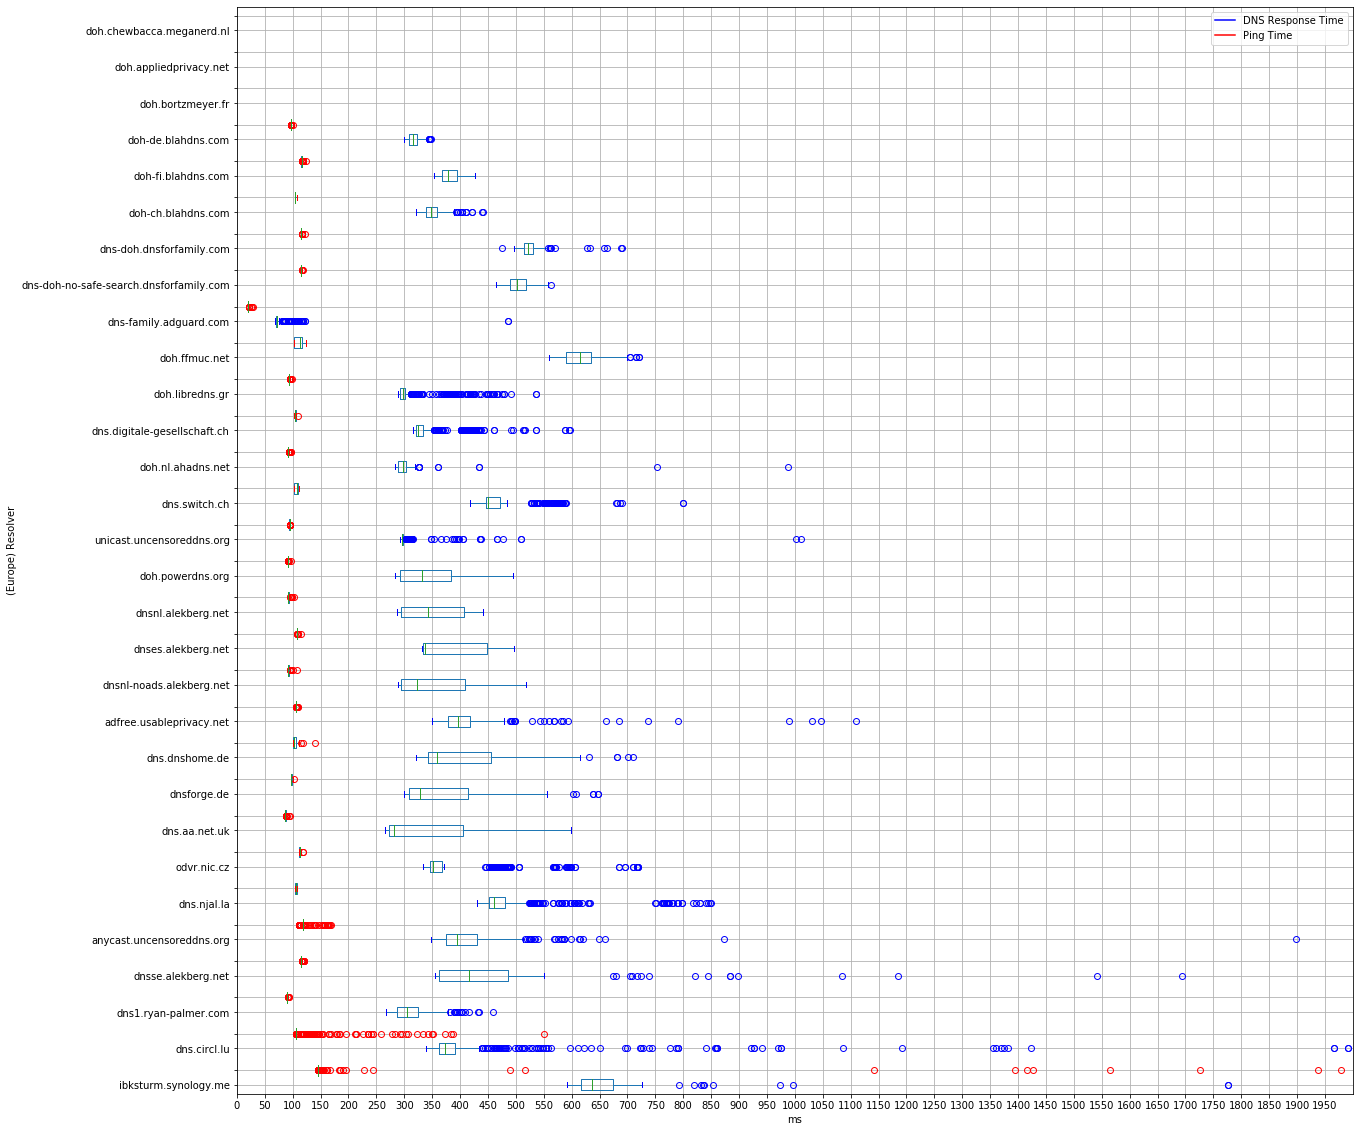

In [42]:
## This boxplot sorts by standard deviation of response time in ascending order



# Europe Boxplot for Response Time, Domain: Google and Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


deviation = eur_frame_to_plot.std()
deviation.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[deviation.index]
response_times = eur_frame_to_plot[deviation.index]


eur_boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.plot([], c='red', label='Ping Time')
plt.legend()

xl = 2000
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.show()